# 💠KNN💠

In [57]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

## 💠Exploratory data analysis (EDA)

In [58]:
data =pd.read_csv('Zoo.csv')
print('Shape of data ',data.shape)
data.head()

Shape of data  (101, 18)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [59]:
print(data.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [60]:
data.duplicated().sum()

0

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [62]:
print(list(data[data['type']==1]['animal name']))

['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy', 'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe', 'girl', 'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion', 'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'seal', 'sealion', 'squirrel', 'vampire', 'vole', 'wallaby', 'wolf']


In [63]:
Animal_dict={}
for x in range(1,8):
    Animal_dict[x]=[list(data[data['type']==x]['animal name'])]
Animal_dict=pd.DataFrame(Animal_dict).transpose()
Animal_dict['Count']=[len(Animal_dict[0][x]) for x in range(1,8)]
Animal_dict['Type']=['Mammals','Birds','Reptiles','Fish','Amphibians','Insects','Others']
Animal_dict

,0,Count,Type
1,"[aardvark, antelope, bear, boar, buffalo, calf...",41,Mammals
2,"[chicken, crow, dove, duck, flamingo, gull, ha...",20,Birds
3,"[pitviper, seasnake, slowworm, tortoise, tuatara]",5,Reptiles
4,"[bass, carp, catfish, chub, dogfish, haddock, ...",13,Fish
5,"[frog, frog, newt, toad]",4,Amphibians
6,"[flea, gnat, honeybee, housefly, ladybird, mot...",8,Insects
7,"[clam, crab, crayfish, lobster, octopus, scorp...",10,Others


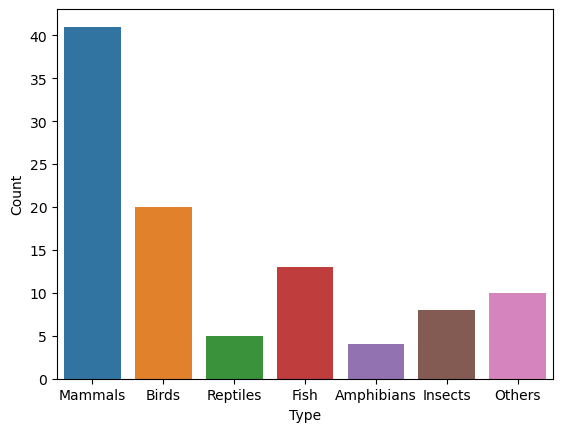

In [64]:
sns.barplot(data=Animal_dict,x='Type',y='Count')
plt.show()

## 💠Train_test_split 

In [65]:
X=data.drop(['animal name','type'],axis=1)                                       # Splitting the data for training and testing  
Y=data['type']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=60)

print('▶Shape of X_train,y_train',(X_train.shape,y_train.shape))
print('▶Shape of X_test,y_test',(X_test.shape,y_test.shape))

▶Shape of X_train,y_train ((80, 16), (80,))
▶Shape of X_test,y_test ((21, 16), (21,))


## 💠Model Building : KNeighborsClassifier

In [73]:
KNN_model=KNeighborsClassifier(n_neighbors=3,metric='euclidean',weights='distance')           # Model Training 
KNN_model.fit(X_train,y_train)

y_predict=KNN_model.predict(X_test)
Y_predict=KNN_model.predict(X_train)

Test accuracy   0.9047619047619048
Train accuracy  1.0
__________________________________________________


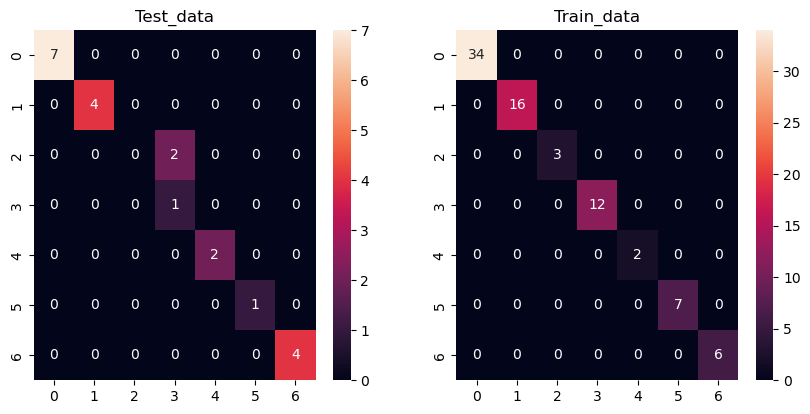

In [74]:
print('Test accuracy  ',accuracy_score (y_test,y_predict))                                    # Model Evaluation 
print('Train accuracy ',accuracy_score (y_train,Y_predict))
print('__________________________________________________')

conf_mat = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.heatmap(conf_mat,annot=True)
plt.title('Test_data')

conf_mat = confusion_matrix(y_train,Y_predict)
plt.subplot(2,2,2)
sns.heatmap(conf_mat,annot=True)
plt.title('Train_data')

plt.show()

### 🚩Note:- Cannot visualize the decision boundaries of the classifier with higher dimensional features
### [16 Dimensions]

## 💠Interview Questions:
#### 1.What are the key hyperparameters in KNN?
    The key hyperparameters includes n_neighbors,weights,metric
    ► n_neighbors: Selecting number of neighbors for queries.
    ► weights: It assigns weightage to neighbors.
    ► metric: Metric to use for distance computation.

#### 2.What distance metrics can be used in KNN?
    Most commonly used distances are:Euclidean Distance,Manhattan Distance,Minkowski Distance
    Euclidean Distance is nothing but the cartesian distance between the two points which are in the plane/hyperplane.
    Manhattan Distance metric is generally used when we are interested in the total distance traveled by the object instead of the displacement.
    The Euclidean, as well as the Manhattan distance, are special cases of the Minkowski distance.
    ‖ u − v ‖ p = ( ∑ | u i − v i | p ) 1 / p
    From the formula above we can say that when p = 2 then it is the same as the formula for the Euclidean distance and when p = 1 then we obtain the formula for the Manhattan distance



